In [1]:
# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

# General data analysis/plotting
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow
tensorflow.random.set_seed(1234)

# Neural Net modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras import layers

In [8]:
cluster_candidates = pd.read_csv('/Users/steven/Documents/CPoint/data/pleiades_candidates.csv')
del cluster_candidates['Unnamed: 0']
del cluster_candidates['Unnamed: 0.1']

for i in range(len(cluster_candidates)):
        #if (np.median(cluster_candidates['ra']) > 300.) or (np.median(cluster_candidates['ra']) < 10.):
        if cluster_candidates['ra'].values[i] > 300.:
                cluster_candidates['ra'].values[i] -= 360
                #cluster_candidates.loc[cluster_candidates['ra'] > 300, 'ra'] -= 360

print(len(cluster_candidates))

cluster_candidates_rv = cluster_candidates[~cluster_candidates['radial_velocity'].isna()]
cluster_candidates_rv = cluster_candidates_rv[~cluster_candidates_rv['radial_velocity_error'].isna()]
cluster_candidates_rv.info()

1649
<class 'pandas.core.frame.DataFrame'>
Index: 557 entries, 0 to 1648
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       557 non-null    int64  
 1   source_id                   557 non-null    int64  
 2   ra                          557 non-null    float64
 3   ra_error                    557 non-null    float64
 4   dec                         557 non-null    float64
 5   dec_error                   557 non-null    float64
 6   l                           557 non-null    float64
 7   b                           557 non-null    float64
 8   parallax                    557 non-null    float64
 9   parallax_error              557 non-null    float64
 10  pmra                        557 non-null    float64
 11  pmra_error                  557 non-null    float64
 12  pmdec                       557 non-null    float64
 13  pmdec_error                 557 no

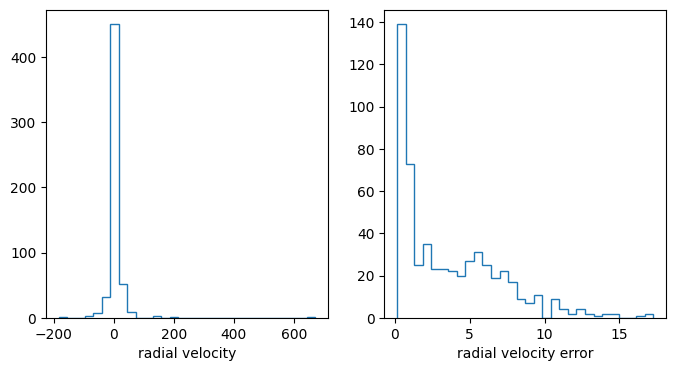

In [9]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.hist(cluster_candidates_rv['radial_velocity'], bins=30, density=False, histtype='step')
plt.xlabel('radial velocity')

plt.subplot(1,2,2)
plt.hist(cluster_candidates_rv['radial_velocity_error'], bins=30, histtype='step', density=False)
plt.xlabel('radial velocity error')
plt.show()

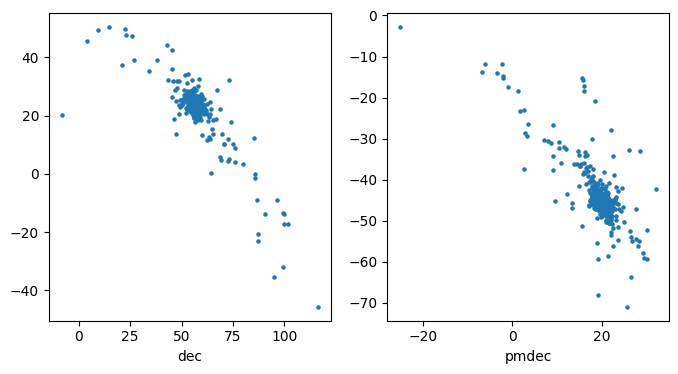

In [10]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.scatter(cluster_candidates_rv['ra'], cluster_candidates_rv['dec'], s=5)
plt.xlabel('ra')
plt.xlabel('dec')

plt.subplot(1,2,2)
plt.scatter(cluster_candidates_rv['pmra'], cluster_candidates_rv['pmdec'], s=5)
plt.xlabel('pmra')
plt.xlabel('pmdec')
plt.show()

In [34]:
#x_data = np.array(cluster_candidates_rv[['ra','dec','pmra','pmdec','parallax']])
x_data = np.array(cluster_candidates_rv[['ra','dec','pmra','pmdec','parallax','radial_velocity_error']])
#x_data = np.array(cluster_candidates_rv[['l','b','pmra','pmdec','parallax']])

#y_data = np.array(cluster_candidates_rv[['radial_velocity','radial_velocity_error']])
y_data = np.array(cluster_candidates_rv[['radial_velocity']])

x_data.shape, y_data.shape

((557, 6), (557, 1))

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=42)

# use minMax scaler
min_max_scaler = MinMaxScaler()
x_train = min_max_scaler.fit_transform(x_train)
x_test = min_max_scaler.transform(x_test)

print('Training shape:', x_train.shape, y_train.shape)
print('Testing shape:', x_test.shape, y_test.shape)

Training shape: (389, 6) (389, 1)
Testing shape: (168, 6) (168, 1)


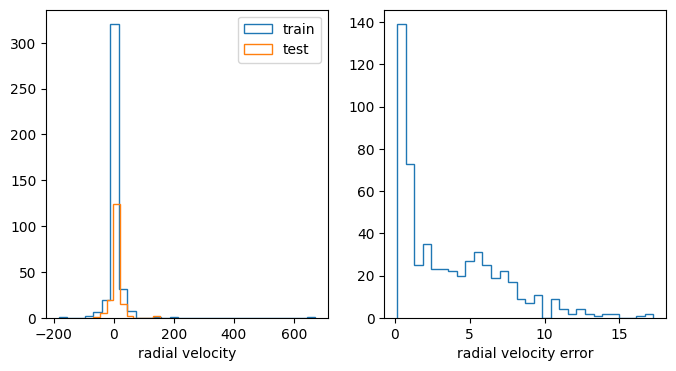

In [36]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.hist(y_train, bins=30, density=False, histtype='step', label='train')
plt.hist(y_test, bins=10, density=False, histtype='step', label='test')
plt.legend()
plt.xlabel('radial velocity')

plt.subplot(1,2,2)
plt.hist(cluster_candidates_rv['radial_velocity_error'], bins=30, histtype='step', density=False)
plt.xlabel('radial velocity error')
plt.show()

In [37]:
tensorflow.keras.backend.clear_session()

In [38]:
# # build the model!
# model = Sequential()
# model.add(Dense(1000, input_shape=(x_train.shape[1],), activation='relu')) # (features,)
# model.add(Dropout(0.2))
# model.add(Dense(500, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(250, activation='relu'))
# model.add(Dense(1, activation='linear')) # output node
# model.summary() # see what your model looks like
#initializer = tensorflow.keras.initializers.glorot_uniform(seed=1)

# build the model!
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(500, activation='relu'), #kernel_initializer=initializer
    Dense(250, activation='relu'),
    Dense(125, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='linear')
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape              ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 500)               │      3,500 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_1 (Dense)                 │ (None, 250)               │    125,250 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_2 (Dense)                 │ (None, 125)               │     31,375 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_3 (Dense)                 │ (None, 50)                │      6,300 │
├─────────────────────────────────┼───────────────────────────┼────────────┤
│ dense_4 (Dense)                 │ (None, 1)                 │         51 │
└─────────────────────────────────┴───────────────────────────┴────────────┘

 Total params: 166,476 (650.30 KB)

 Trainable params: 166,476 (650.30 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
# compile the model
#model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
#model.compile(optimizer=tensorflow.keras.optimizers.Adam(), loss='mse', metrics=['mae'])
#model.compile(optimizer=tensorflow.keras.optimizers.Adam(), loss=custom_loss, metrics=['mae'])
metrics = ['mse', 'mae', 'r2_score']
model.compile(optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=metrics)

# early stopping callback
#es = EarlyStopping(monitor='val_loss', mode='min', patience=50, restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
#history = model.fit(x_train, y_train, validation_data=(x_test, y_test), callbacks=[es], epochs=500, batch_size=30, verbose=1)
history = model.fit(x_train, y_train, epochs=100, batch_size=30, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 928.8675 - mae: 11.4550 - mse: 929.4468 - r2_score: -0.0491 - val_loss: 439.2426 - val_mae: 10.4350 - val_mse: 461.5789 - val_r2_score: -0.0280
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 908.3404 - mae: 10.2343 - mse: 908.9075 - r2_score: -0.0041 - val_loss: 427.9102 - val_mae: 10.0392 - val_mse: 449.1176 - val_r2_score: -2.3997e-04
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 909.6061 - mae: 10.4363 - mse: 910.1714 - r2_score: -0.0131 - val_loss: 427.6310 - val_mae: 10.0787 - val_mse: 448.7699 - val_r2_score: 5.3442e-04
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 909.4152 - mae: 10.3804 - mse: 909.9819 - r2_score: -0.0123 - val_loss: 427.2515 - val_mae: 9.9072 - val_mse: 448.5816 - val_r2_score: 9.5373e-04
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 907.5362 - mae: 10.2542 - mse: 908.1024 - r2_score: -0.0064 - val_loss: 426.8227 - val_mae: 9.9012 - val_mse: 448.1374 -

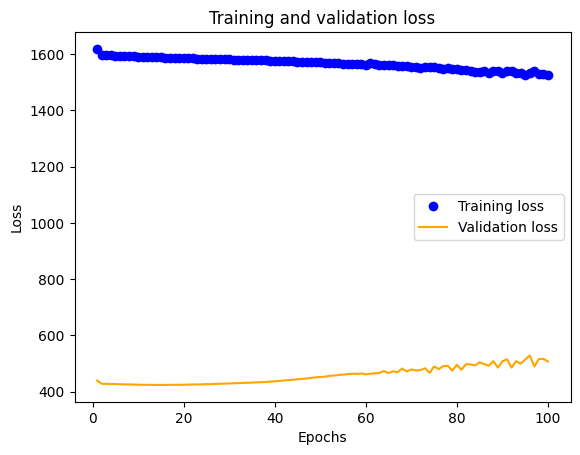

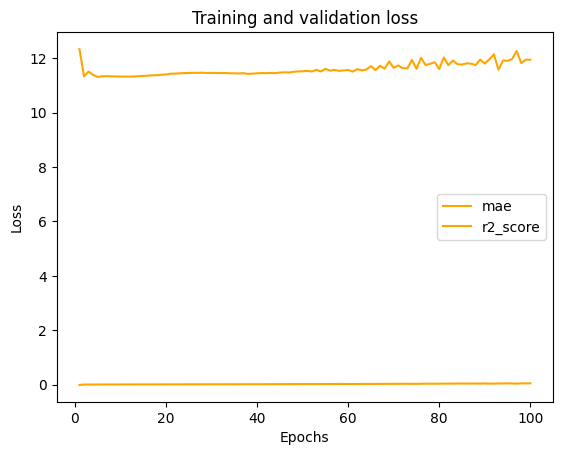

In [40]:
history_dict = history.history
epochs = range(1, len(history_dict['loss']) + 1)

plt.plot(epochs, history_dict['loss'], 'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'], 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#plt.plot(epochs, history_dict['mse'], 'bo', label='mse')
plt.plot(epochs, history_dict['mae'], 'orange', label='mae')
plt.plot(epochs, history_dict['r2_score'], 'orange', label='r2_score')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step


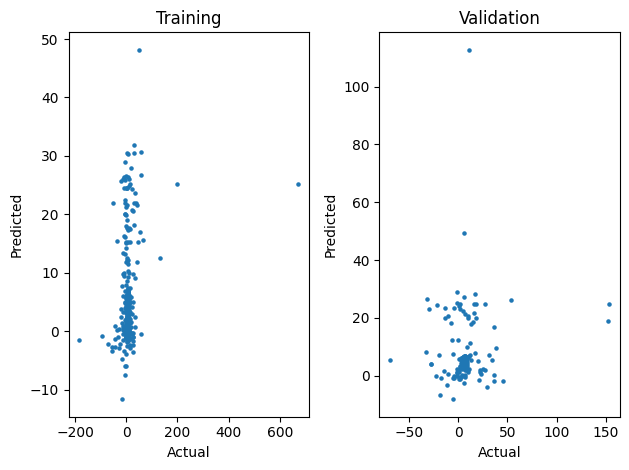

In [41]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(x=y_train, y=model.predict(x_train), s=5)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
x = np.linspace(*axes[0].get_xlim())
#axes[0].plot(x, x, color='red', ls='--', lw=0.5)

axes[1].scatter(x=y_test, y=model.predict(x_test), s=5)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
x = np.linspace(*axes[1].get_xlim())
#axes[1].plot(x, x, color='red', ls='--', lw=0.5)
fig.tight_layout()
plt.show()

In [31]:
# metrics
pred = model.predict(x_test)
pred

trainpreds = model.predict(x_train)

from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step
11.364893307486943
10.147754665107986
